Importing Libraries and Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'E:\My ML Projects\E-Commerce\Ecommerce Customers')

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.shape

(500, 8)

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


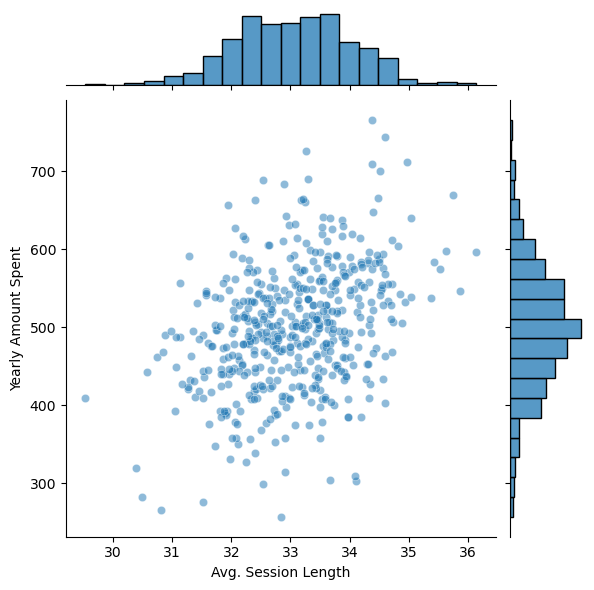

In [7]:

sns.jointplot(x='Avg. Session Length', y='Yearly Amount Spent', data=df, alpha=0.5)

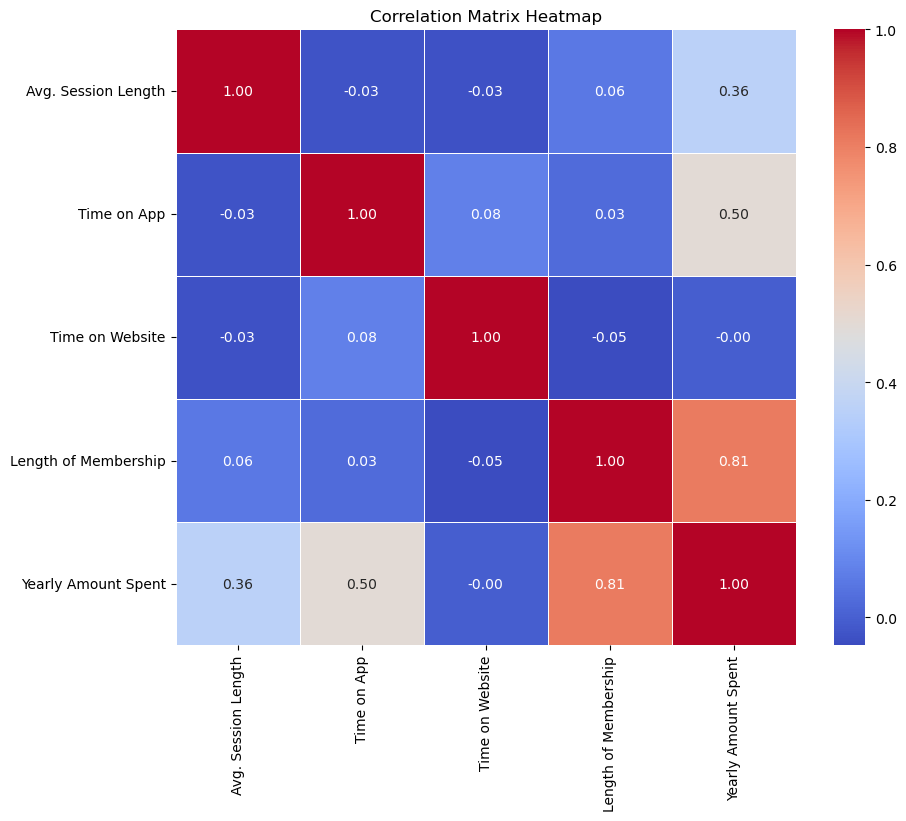

In [8]:

numerical_df = df.select_dtypes(include=['float'])

# 1. Compute the correlation matrix
corr_matrix = numerical_df.corr()

# 2. Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

Randomly Spliting Data Set into Training and Testing.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

Training Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.827920
Time on App           38.809001
Time on Website        0.281743
Length of Membership  61.304799


Predicting

In [32]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

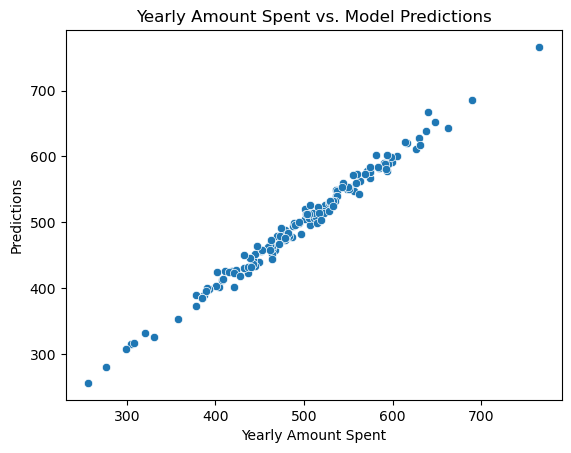

In [33]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [35]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 7.099124594093869
Mean Squared Error: 80.90062369760004
Root Mean Squared Error: 8.99447739991602


C:\Users\kkaly\AppData\Local\Temp\ipykernel_20596\3579009796.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=20)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

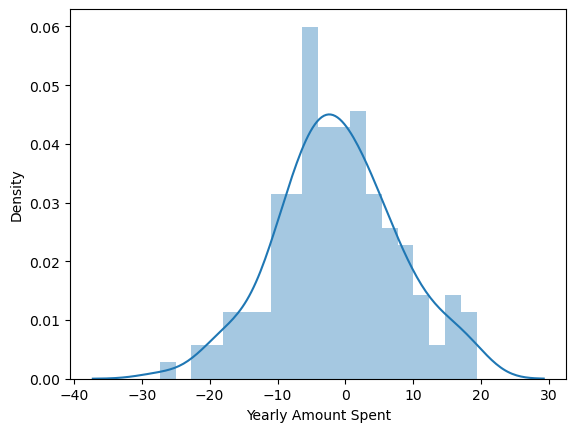

In [36]:
residuals = y_test-predictions
sns.distplot(residuals, bins=20)

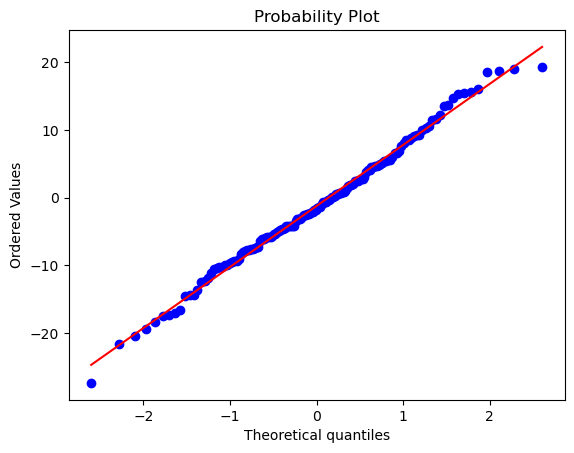

In [38]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()